(0.1923917300664661+1.761063988222529e-07j)


C:\Users\MohamedAbouelela\anaconda3\envs\quantumThesis\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


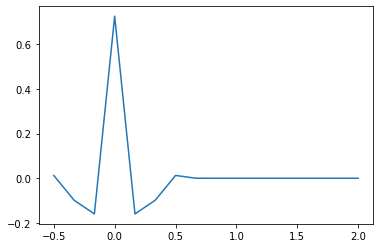

In [10]:
import matplotlib.pyplot as plt
import math
import numpy as np
from qiskit.circuit.library import NormalDistribution
from math import pi
from qiskit import IBMQ, BasicAer, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram

#Preparing the sine-shaped histogram that will be used in the initialisation


x = np.linspace(-0.5,2, num=16)
storage_for_normalisation = []

Normalisation_wavefunction = (1/(np.sqrt(2*np.pi)*2*0.4)*np.exp(-(0.5*x**2)/(2*0.016)))*np.exp(200j*x)

Normalisation_Constant = np.sqrt(np.sum(np.abs(Normalisation_wavefunction**2)))

waveFunction = (Normalisation_wavefunction)/(Normalisation_Constant)
print(sum(waveFunction**2))
plt.plot(x,waveFunction)
plt.show()

In [12]:


#n = 6 #number of qubits not including ancilla
phi = 0.1
V = 2



qb = 4  #Number of active qubits. Not including Ancilla
cbits = 4

q = QuantumRegister(qb + 1)
c = ClassicalRegister(cbits)
qc = QuantumCircuit(q)

qc2 = QuantumCircuit(q,c)

initialisation = QuantumCircuit(q,c)

#Initialisation


def QFT(qubits):
    qc.swap(1,4)
    qc.swap(2,3)
    for i in range(qubits):
        qc.h(i+1)
        for j in range(qubits - 1 - i):
            qc.cp(pi/(2**(j+1)), i+2+j, i+1)


def Time_Evolution(qubits):
    for i in range (qubits):
        qc.p(phi/(2**(i+qubits-3)), qubits-i)
    for i in range (qubits):
        for j in range (i+1,qubits):
            qc.cx(qubits-j, 0)
            qc.cx(qubits-i, 0)
            qc.p(phi* (2**(2-i-j)), 0) #2-i-j or 4?
            qc.cx(qubits-i, 0)
            qc.cx(qubits-j, 0)


def QFT_Inv(qubits):
    for i in reversed(range(qubits)):
        for j in range(qubits - 1 - i):
            qc.cp(-pi/(2**(j+1)), i+2+j, i+1)
        qc.h(i+1)            
    qc.swap(1,4)
    qc.swap(2,3)      
            
##############################################  INITILIZATION    ###################################################################




initialisation.initialize(waveFunction, [q[1],q[2],q[3],q[4]])

initialisation.draw()


l = 0

for l in range(10):

    qc2.initialize(waveFunction, [q[1],q[2],q[3],q[4]])

########################################### POTENTIAL   ############################################################################




    qc.p(V*phi,qb)



#########################################  QUANTUM FOURIER TRANSFORM ###################################


            
    QFT(qb)

    qc.x(qb)
    
#for k in range(qb):
#    qc.measure(k+1,k)


   #Centering the Momentum

###############################################  TIME STEP  ##############################################################
    
    
    Time_Evolution(qb)


###############################################  Inverse QFT   ####################################################


    qc.x(qb)
    
    QFT_Inv(qb)



#totqc = qc.to_gate()



    for i in range(l):
        qc2.append(qc, [0,1,2,3,4])



#Measurement


    for k in range(qb):
        qc2.measure(k+1,k)

    #backend = BasicAer.get_backend('qasm_simulator')
    #shots = 65536
    #results = execute(qc2, backend=backend, shots=shots).result()
    #answer = results.get_counts()
    
    
        
    IBMQ.load_account()
    provider = IBMQ.get_provider('ibm-q')
    qcomp = provider.get_backend('ibmq_vigo')
    job = execute(qc2, backend=qcomp, shots=8192)

    from qiskit.tools.monitor import job_monitor

    job_monitor(job)
        
    result = job.result()
    answer = result.get_counts()
    
    for a in range(2**qb):
        s = '{0:04b}'.format(a)
        if s not in answer.keys():
            answer[s] = 0
            #result.get_counts()[s] = 0
    plot_histogram(answer, title = "Particle in a Step Potential", figsize = [20,10]).savefig('F:\Thesis\\Step Potential\\1V\\tenV\\2 Volts\\quantumcomputer\\tenTun'+ str(l) +'.png')
    qc2.data = []
#qc2.draw('mpl')
#plot_histogram(answer, figsize = [20, 20])

ibmqfactory.load_account:WARNING:2020-12-19 22:44:51,703: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2020-12-19 22:45:46,638: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2020-12-19 22:46:54,122: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2020-12-19 22:47:53,213: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2020-12-19 22:49:03,869: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2020-12-19 22:58:01,597: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job is queued (2)     

KeyboardInterrupt: 